# Анализ датасета ATIS

## Установка зависимостей

In [116]:
%pip install pandas
%pip install matplotlib
%pip install numpy


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/opt/homebrew/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installa

## Преподготовка

Подготовим данные датасета для удобного анализа, уменьшим nesting

In [117]:
import string

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import utils


In [118]:
atis_path = "../data/source/atis/"


In [119]:
from dataclasses import dataclass


@dataclass
class Atis:
    train: pd.DataFrame
    test: pd.DataFrame


In [120]:
train_df = pd.read_json(atis_path + "train.json")
test_df = pd.read_json(atis_path + "test.json")
atis = Atis(train=train_df, test=test_df)


In [121]:
# Reduce nesting
atis.train = pd.DataFrame(
    atis.train["rasa_nlu_data"]["common_examples"]
)
atis.test = pd.DataFrame(
    atis.test["rasa_nlu_data"]["common_examples"]
)



In [122]:
atis.train


,text,intent,entities
0,i want to fly from boston at 838 am and arrive...,flight,"[{'start': 19, 'end': 25, 'value': 'boston', '..."
1,what flights are available from pittsburgh to ...,flight,"[{'start': 32, 'end': 42, 'value': 'pittsburgh..."
2,what is the arrival time in san francisco for ...,flight_time,"[{'start': 12, 'end': 24, 'value': 'arrival ti..."
3,cheapest airfare from tacoma to orlando,airfare,"[{'start': 1, 'end': 9, 'value': 'cheapest', '..."
4,round trip fares from pittsburgh to philadelph...,airfare,"[{'start': 1, 'end': 11, 'value': 'round trip'..."
...,...,...,...
4972,what is the airfare for flights from denver to...,airfare,"[{'start': 37, 'end': 43, 'value': 'denver', '..."
4973,do you have any flights from denver to baltimo...,flight,"[{'start': 29, 'end': 35, 'value': 'denver', '..."
4974,which airlines fly into and out of denver,airline,"[{'start': 35, 'end': 41, 'value': 'denver', '..."
4975,does continental fly from boston to san franci...,flight,"[{'start': 5, 'end': 16, 'value': 'continental..."


In [123]:
atis.test


,text,intent,entities
0,i would like to find a flight from charlotte t...,flight,"[{'start': 35, 'end': 44, 'value': 'charlotte'..."
1,on april first i need a ticket from tacoma to ...,airfare,"[{'start': 3, 'end': 8, 'value': 'april', 'ent..."
2,on april first i need a flight going from phoe...,flight,"[{'start': 3, 'end': 8, 'value': 'april', 'ent..."
3,i would like a flight traveling one way from p...,flight,"[{'start': 32, 'end': 39, 'value': 'one way', ..."
4,i would like a flight from orlando to salt lak...,flight,"[{'start': 27, 'end': 34, 'value': 'orlando', ..."
...,...,...,...
888,please find all the flights from cincinnati to...,flight,"[{'start': 33, 'end': 43, 'value': 'cincinnati..."
889,find me a flight from cincinnati to any airpor...,flight,"[{'start': 22, 'end': 32, 'value': 'cincinnati..."
890,i 'd like to fly from miami to chicago on amer...,flight,"[{'start': 22, 'end': 27, 'value': 'miami', 'e..."
891,i would like to book a round trip flight from ...,flight,"[{'start': 23, 'end': 33, 'value': 'round trip..."


## Анализ интентов

In [124]:
@dataclass
class IntentClasses:
    train: list
    test: list


In [125]:
intent_classes_train = utils.get_intent_classes(atis.train)
intent_classes_test = utils.get_intent_classes(atis.test)
intent_classes = IntentClasses(
    train=intent_classes_train, test=intent_classes_test
)


In [126]:
@dataclass
class IntentClassesDistribution:
    train: dict
    train_size: int
    test: dict
    test_size: int
    df: pd.DataFrame


In [127]:
intent_classes_distribution_train = utils.eval_intent_classes_distribution(
    atis.train, intent_classes.train
)
intents_count_train = np.array(
    list(intent_classes_distribution_train.values())
).sum()
intent_classes_distribution_train_persents = utils.eval_persentage(
    intent_classes_distribution_train, intents_count_train
)

intent_classes_distribution_test = utils.eval_intent_classes_distribution(
    atis.test, intent_classes.test
)
intents_count_test = np.array(
    list(intent_classes_distribution_test.values())
).sum()
intent_classes_distribution_test_persents = utils.eval_persentage(
    intent_classes_distribution_test, intents_count_test
)

intent_classes_distribution_df = pd.DataFrame({
    "train": intent_classes_distribution_train_persents,
    "test": intent_classes_distribution_test_persents
})

intent_classes_distribution = IntentClassesDistribution(
    train=intent_classes_distribution_train_persents, train_size=intents_count_train,
    test=intent_classes_distribution_test_persents, test_size=intents_count_test,
    df=intent_classes_distribution_df
)


In [128]:
intent_classes_distribution.df


,train,test
flight,73.658831,70.772676
airfare,8.499096,5.375140
ground_service,5.123568,4.031355
airline,3.154511,4.255319
abbreviation,2.953586,3.695409
aircraft,1.627486,1.007839
flight_time,1.084991,0.111982
quantity,1.024714,0.335946
flight+airfare,0.421941,1.343785
distance,0.401849,1.119821


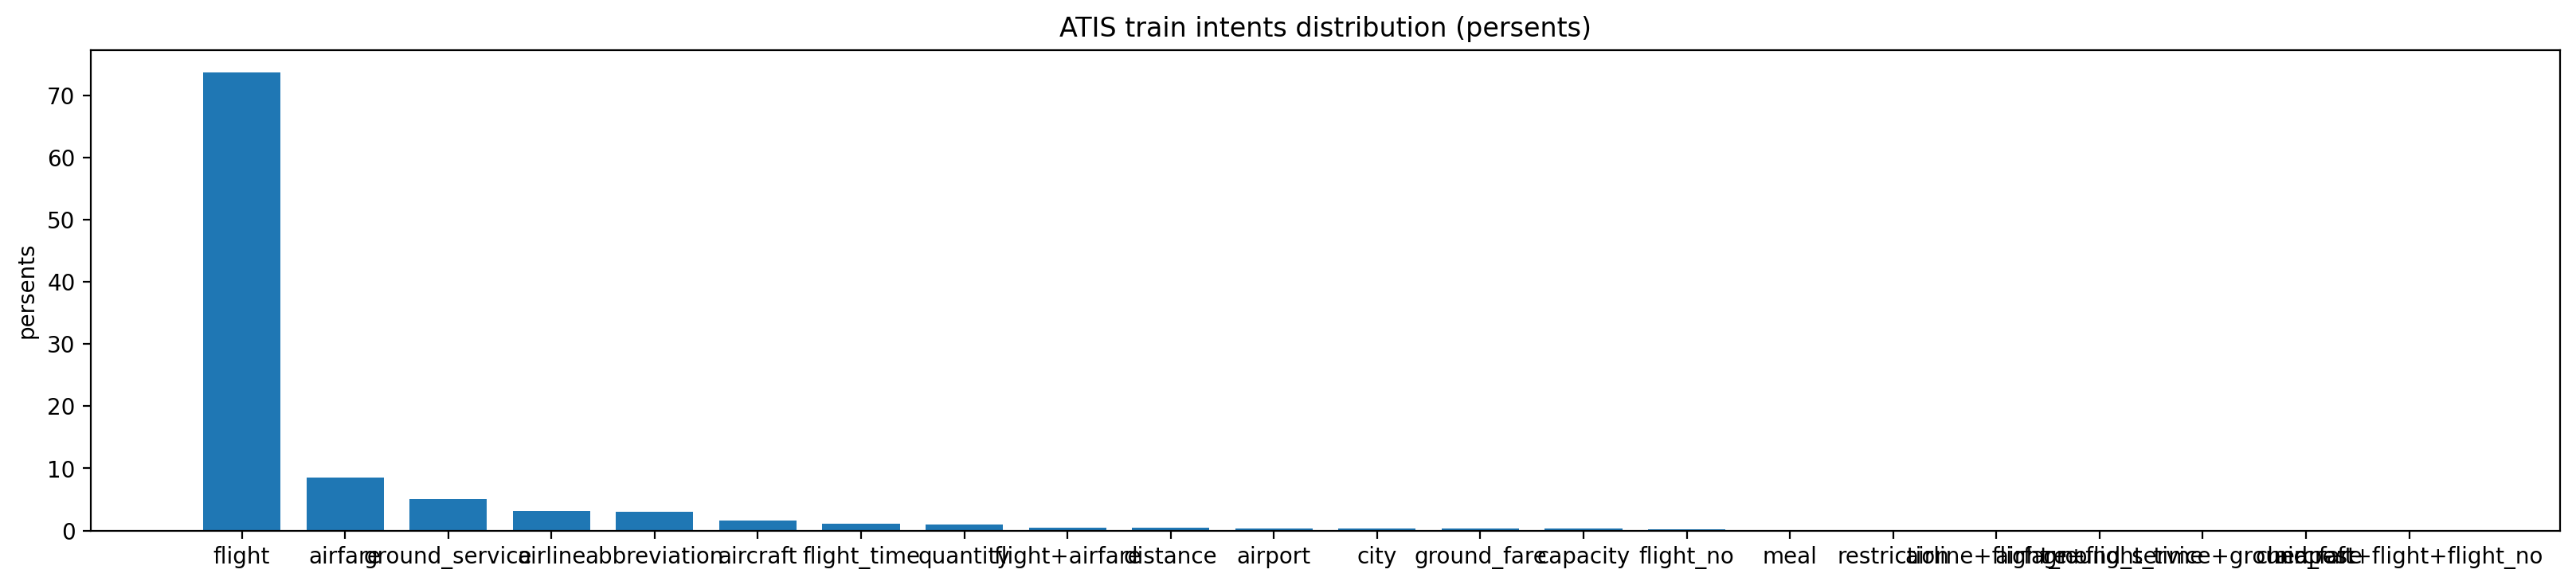

In [129]:
utils.show_classes_distribution(
    intent_classes_distribution.train,
    plt_name="ATIS train intents distribution (persents)",
    ylabel="persents",
    dpi=200
)


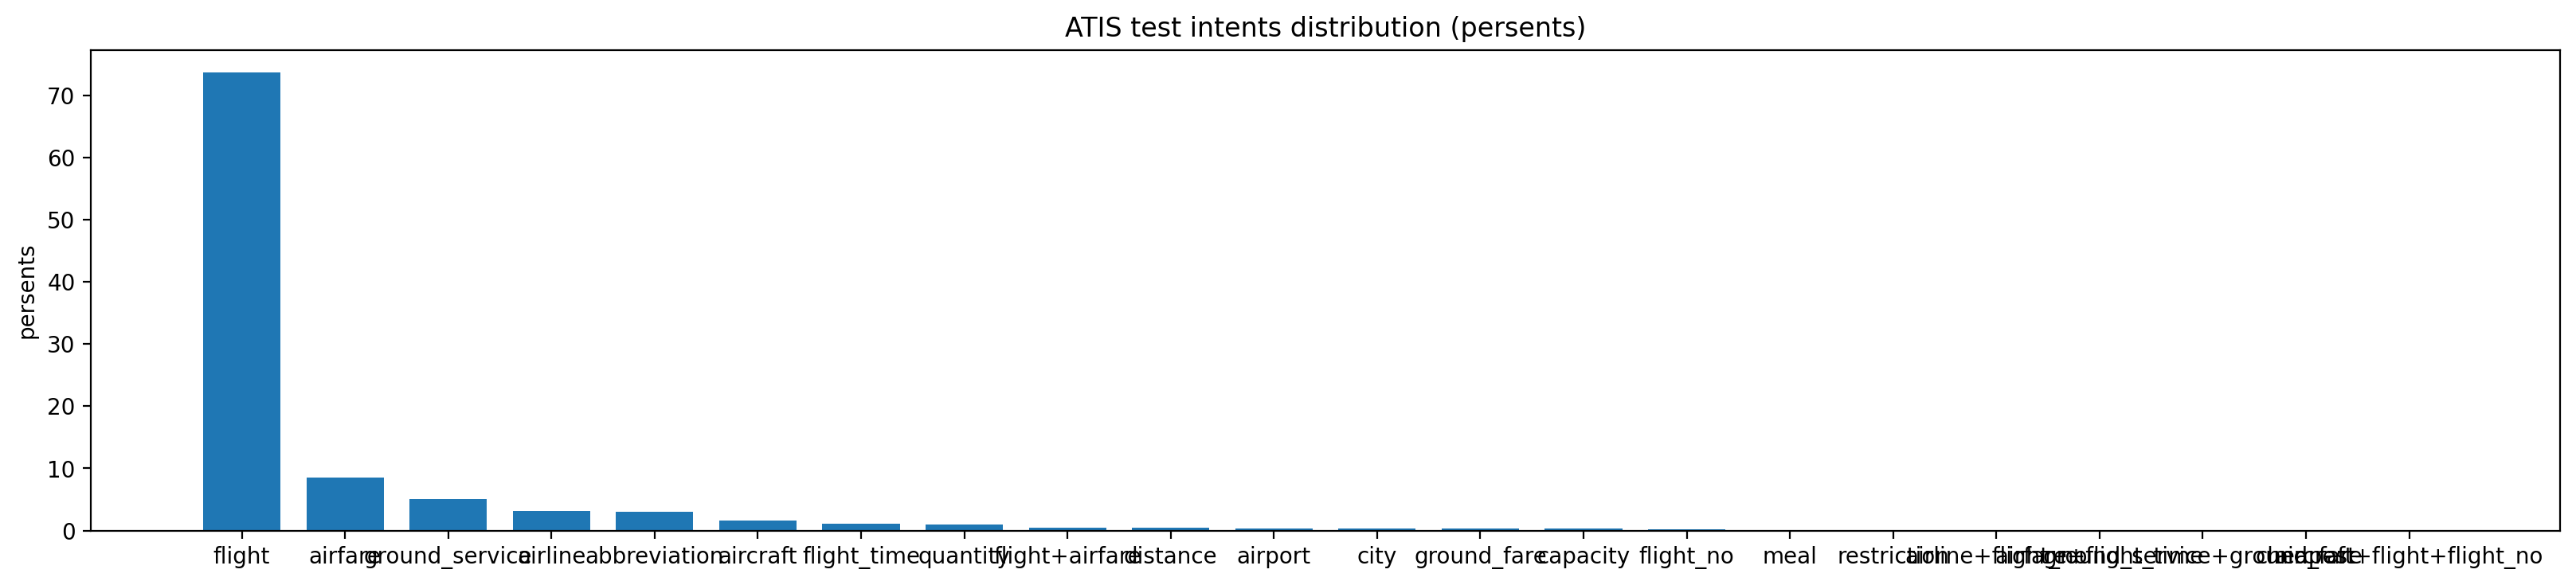

In [130]:
utils.show_classes_distribution(
    intent_classes_distribution.train,
    plt_name="ATIS test intents distribution (persents)",
    ylabel="persents",
    dpi=200
)


## Анализ сущностей

In [131]:
@dataclass
class EntityClasses:
    train: list
    test: list


In [132]:
entity_classes_train = utils.get_entity_classes(atis.train)
entity_classes_test = utils.get_entity_classes(atis.test)
entity_classes = EntityClasses(
    train=entity_classes_train, test=entity_classes_test
)


In [133]:
@dataclass
class EntityClassesDistribution:
    train: dict
    train_size: int
    test: dict
    test_size: int
    df: pd.DataFrame


In [134]:
entity_classes_distribution_train = utils.eval_entity_classes_distribution(
    atis.train, entity_classes.train
)
entities_count_train = np.array(
    list(entity_classes_distribution_train.values())
).sum()
entity_classes_distribution_train_persents = utils.eval_persentage(
    entity_classes_distribution_train, entities_count_train
)

entity_classes_distribution_test = utils.eval_entity_classes_distribution(
    atis.test, entity_classes.test
)
entities_count_test = np.array(
    list(entity_classes_distribution_test.values())
).sum()
entity_classes_distribution_test_persents = utils.eval_persentage(
    entity_classes_distribution_test, entities_count_test
)

intent_classes_distribution_df = pd.DataFrame({
    "train": entity_classes_distribution_train_persents,
    "test": entity_classes_distribution_test_persents
})

entity_classes_distribution = EntityClassesDistribution(
    train=entity_classes_distribution_train_persents, train_size=entities_count_train,
    test=entity_classes_distribution_test_persents, test_size=entities_count_test,
    df=intent_classes_distribution_df
)


In [135]:
entity_classes_distribution.df

,train,test
toloc.city_name,26.229013,25.237927
fromloc.city_name,26.126344,24.814945
depart_date.day_name,5.369006,7.472682
airline_name,4.233603,3.560099
depart_time.period_of_day,3.581350,4.582305
...,...,...
stoploc.airport_name,0.006039,NaN
booking_class,NaN,0.035249
compartment,NaN,0.035249
flight,NaN,0.035249


In [136]:
entity_classes_distribution.df.tail(25)

,train,test
meal_code,0.036236,0.035249
period_of_day,0.030197,0.140994
day_name,0.030197,0.070497
stoploc.state_code,0.030197,NaN
return_date.month_name,0.024158,NaN
arrive_time.period_mod,0.024158,NaN
return_date.day_number,0.024158,NaN
toloc.country_name,0.018118,0.035249
days_code,0.018118,0.035249
return_time.period_of_day,0.018118,NaN


In [137]:
print(
    f"Intent classes mean in dataset\n{entity_classes_distribution.df.mean()}"
)


Intent classes mean in dataset
train    1.265823
test     1.449275
dtype: float64


In [138]:
utils.show_classes_distribution(
    entity_classes_distribution.train,
    plt_name="ATIS entity classes distribution (entries)",
    ylabel="entries",
    figsize=(125, 10),
    dpi=400
)


In [139]:
utils.show_classes_distribution(
    entity_classes_distribution.test,
    plt_name="ATIS entity classes distribution (entries)",
    ylabel="entries",
    figsize=(125, 10),
    dpi=400
)


### Анализ сущностей по категориям классов

Было выделено несколько категорий классов:

1) Время
2) Даты
3) Локации
4) Разное


#### 1. Время

In [140]:
time_category = utils.get_entity_classes_in_category(
    "time", entity_classes.train
)
periods_of_day = utils.get_entity_classes_in_category(
    "period_of_day", entity_classes.train
)
time_category += periods_of_day
time_category


['flight_time',
 'arrive_time.time',
 'depart_time.time_relative',
 'depart_time.start_time',
 'arrive_time.period_mod',
 'time',
 'arrive_time.time_relative',
 'arrive_time.start_time',
 'time_relative',
 'depart_time.end_time',
 'arrive_time.period_of_day',
 'arrive_time.end_time',
 'depart_time.period_mod',
 'return_time.period_mod',
 'depart_time.period_of_day',
 'return_time.period_of_day',
 'depart_time.time',
 'period_of_day',
 'arrive_time.period_of_day',
 'depart_time.period_of_day',
 'return_time.period_of_day']

In [141]:
time_category_distribution = utils.eval_entity_classes_distribution(
    atis.train, time_category
)
time_category_persentage = utils.eval_persentage(
    time_category_distribution, entity_classes_distribution.train_size
)

print(
    pd.DataFrame({"time_category_persentage": time_category_persentage})
      .sort_values(by="time_category_persentage", ascending=False)
)


                           time_category_persentage
depart_time.period_of_day                  3.581350
depart_time.time                           2.228530
depart_time.time_relative                  1.950719
arrive_time.time                           1.256190
arrive_time.time_relative                  1.129363
flight_time                                0.428796
arrive_time.period_of_day                  0.386520
depart_time.period_mod                     0.265733
depart_time.start_time                     0.150984
depart_time.end_time                       0.150984
arrive_time.start_time                     0.126827
arrive_time.end_time                       0.120788
period_of_day                              0.030197
arrive_time.period_mod                     0.024158
return_time.period_of_day                  0.018118
return_time.period_mod                     0.012079
time                                       0.012079
time_relative                              0.006039


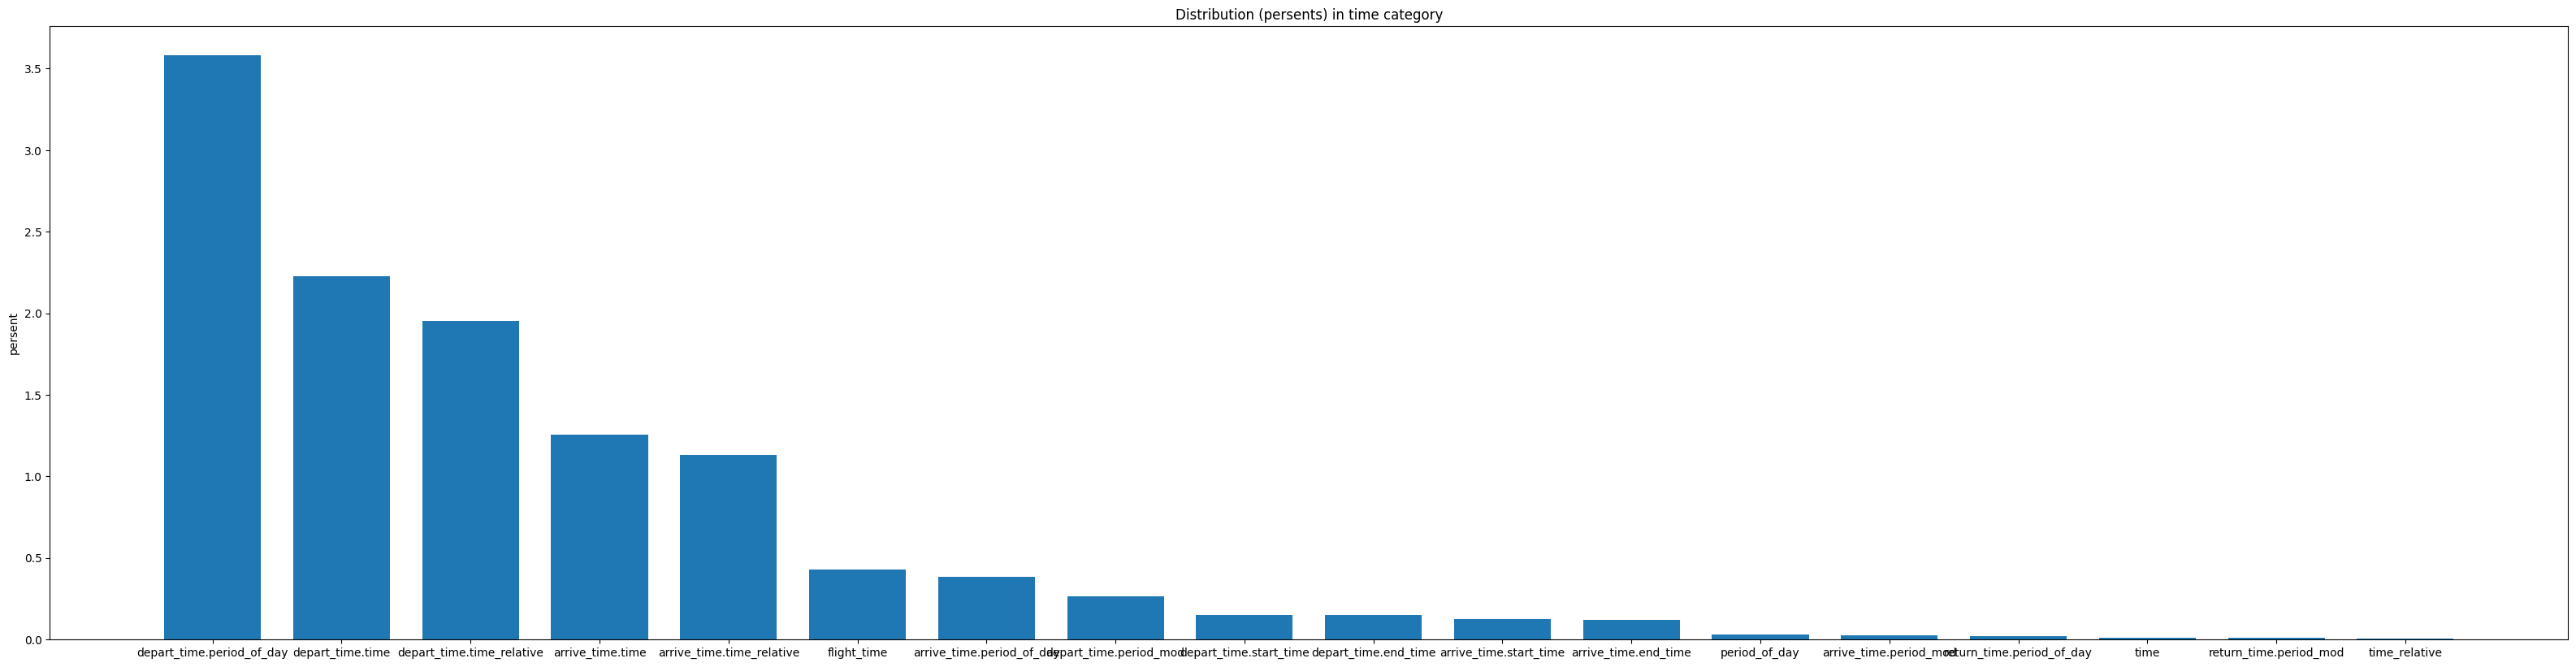

In [142]:
utils.show_classes_distribution(
    time_category_persentage,
    plt_name="Distribution (persents) in time category",
    ylabel="persent",
    figsize=(40, 10)
)


#### 2. Даты

In [143]:
date_category = utils.get_entity_classes_in_category(
    "date", entity_classes.train
)
day_names = utils.get_entity_classes_in_category(
    "day_name", entity_classes.train
)
day_numbers = utils.get_entity_classes_in_category(
    "day_number", entity_classes.train
)
month_names = utils.get_entity_classes_in_category(
    "month_name", entity_classes.train
)
today_relatives = utils.get_entity_classes_in_category(
    "today_relative", entity_classes.train
)
date_category += day_names + day_numbers + month_names + today_relatives
print(date_category)


['arrive_date.month_name', 'depart_date.day_name', 'arrive_date.day_number', 'depart_date.month_name', 'return_date.month_name', 'return_date.day_name', 'return_date.date_relative', 'depart_date.date_relative', 'depart_date.day_number', 'arrive_date.date_relative', 'arrive_date.day_name', 'depart_date.today_relative', 'arrive_date.today_relative', 'return_date.day_number', 'depart_date.year', 'return_date.today_relative', 'depart_date.day_name', 'return_date.day_name', 'day_name', 'arrive_date.day_name', 'arrive_date.day_number', 'depart_date.day_number', 'return_date.day_number', 'day_number', 'arrive_date.month_name', 'depart_date.month_name', 'return_date.month_name', 'month_name', 'today_relative', 'depart_date.today_relative', 'arrive_date.today_relative', 'return_date.today_relative']


In [144]:
date_category_distribution = utils.eval_entity_classes_distribution(
    atis.train, date_category
)
date_category_persentage = utils.eval_persentage(
    date_category_distribution, entity_classes_distribution.train_size
)

print(
    pd.DataFrame({"date_category_persentage": date_category_persentage})
      .sort_values(by="date_category_persentage", ascending=False)
)


                            date_category_persentage
depart_date.day_name                        5.369006
depart_date.day_number                      2.385554
depart_date.month_name                      2.288924
arrive_date.day_name                        0.531465
depart_date.today_relative                  0.507308
depart_date.date_relative                   0.495229
arrive_date.day_number                      0.283851
arrive_date.month_name                      0.283851
depart_date.year                            0.150984
arrive_date.date_relative                   0.066433
return_date.date_relative                   0.060394
day_name                                    0.030197
return_date.day_number                      0.024158
return_date.month_name                      0.024158
day_number                                  0.012079
arrive_date.today_relative                  0.012079
month_name                                  0.012079
today_relative                              0.

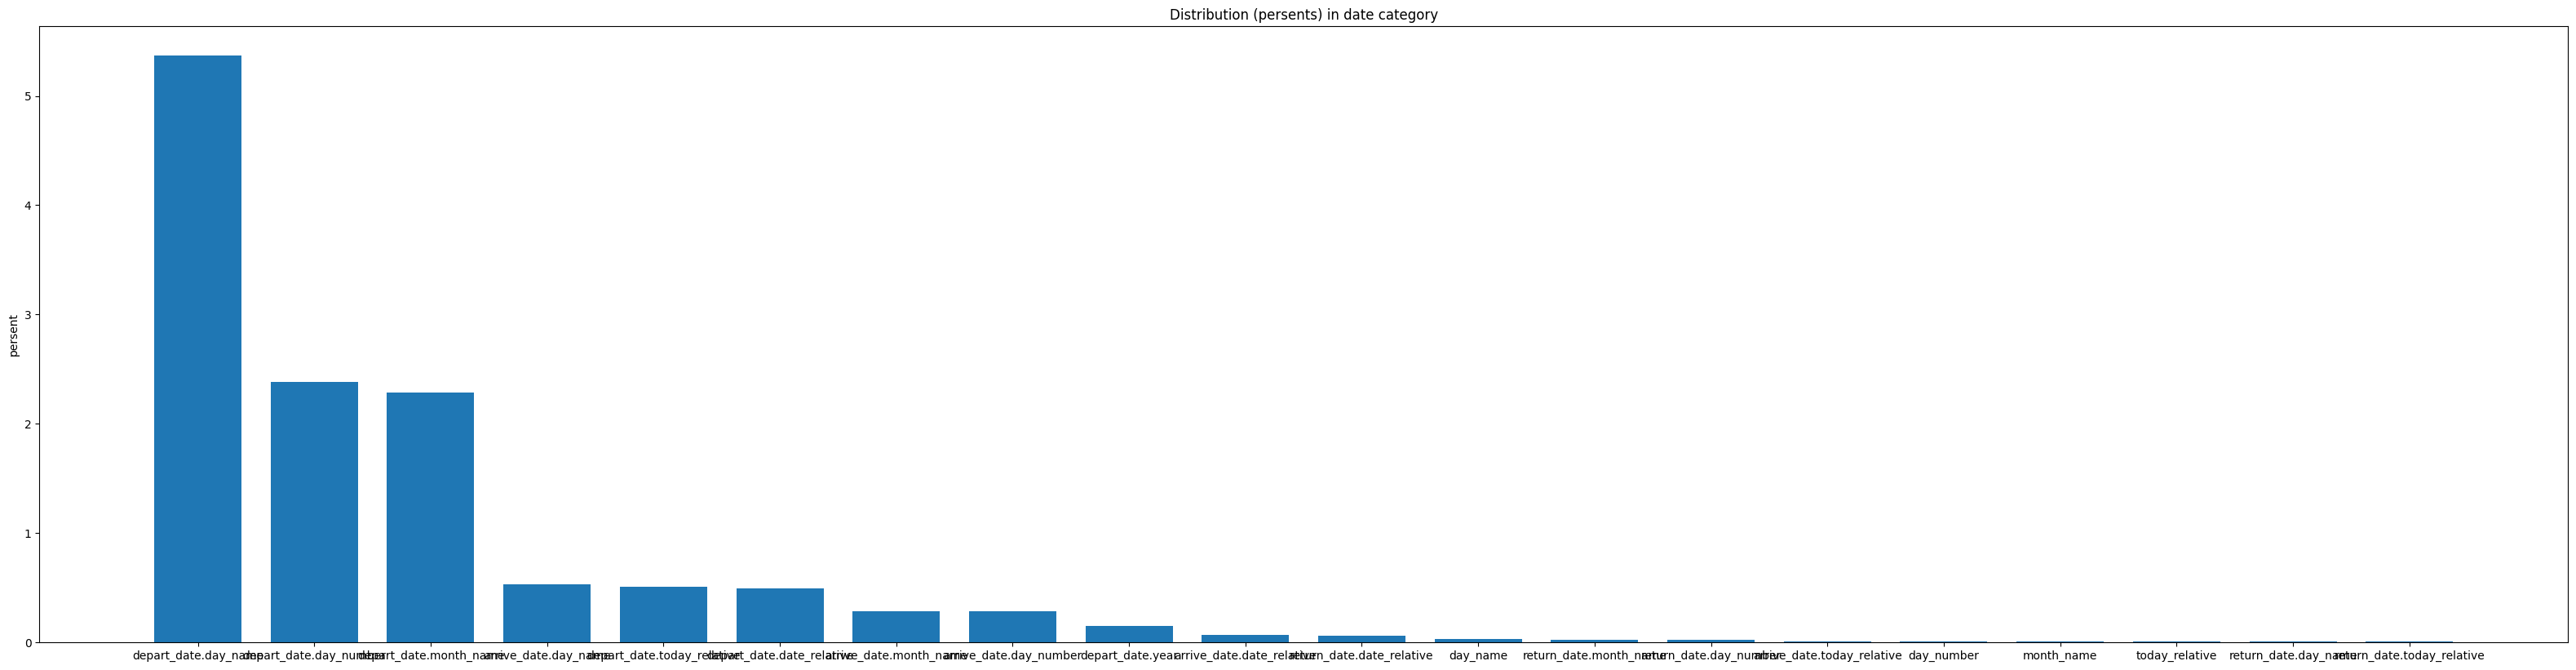

In [145]:
utils.show_classes_distribution(
    date_category_persentage,
    plt_name="Distribution (persents) in date category",
    ylabel="persent",
    figsize=(40, 10)
)


#### 3. Локации

In [146]:
loc_category = utils.get_entity_classes_in_category(
    "city", entity_classes.train
)
states = utils.get_entity_classes_in_category(
    "state", entity_classes.train
)
airports = utils.get_entity_classes_in_category(
    "airport", entity_classes.train
)
countries = utils.get_entity_classes_in_category(
    "country", entity_classes.train
)

loc_category = list(set(loc_category + states + airports + countries))
print(loc_category)


['state_code', 'toloc.city_name', 'fromloc.state_name', 'stoploc.city_name', 'fromloc.airport_code', 'toloc.airport_code', 'toloc.airport_name', 'airport_code', 'toloc.state_code', 'fromloc.state_code', 'toloc.country_name', 'fromloc.airport_name', 'state_name', 'toloc.state_name', 'city_name', 'stoploc.state_code', 'airport_name', 'fromloc.city_name', 'stoploc.airport_name']


In [147]:
loc_category_distribution = utils.eval_entity_classes_distribution(
    atis.train, loc_category
)
loc_category_persentage = utils.eval_persentage(
    loc_category_distribution, entity_classes_distribution.train_size
)

print(
    pd.DataFrame({"loc_category_persentage": loc_category_persentage})
      .sort_values(by="loc_category_persentage", ascending=False)
)


                      loc_category_persentage
toloc.city_name                     26.229013
fromloc.city_name                   26.126344
stoploc.city_name                    1.437372
city_name                            1.364899
fromloc.airport_name                 0.537505
toloc.state_code                     0.519386
toloc.state_name                     0.465032
fromloc.state_code                   0.277811
fromloc.state_name                   0.235536
toloc.airport_name                   0.235536
airport_name                         0.229496
airport_code                         0.175142
toloc.airport_code                   0.120788
fromloc.airport_code                 0.090591
state_code                           0.048315
stoploc.state_code                   0.030197
toloc.country_name                   0.018118
state_name                           0.012079
stoploc.airport_name                 0.006039


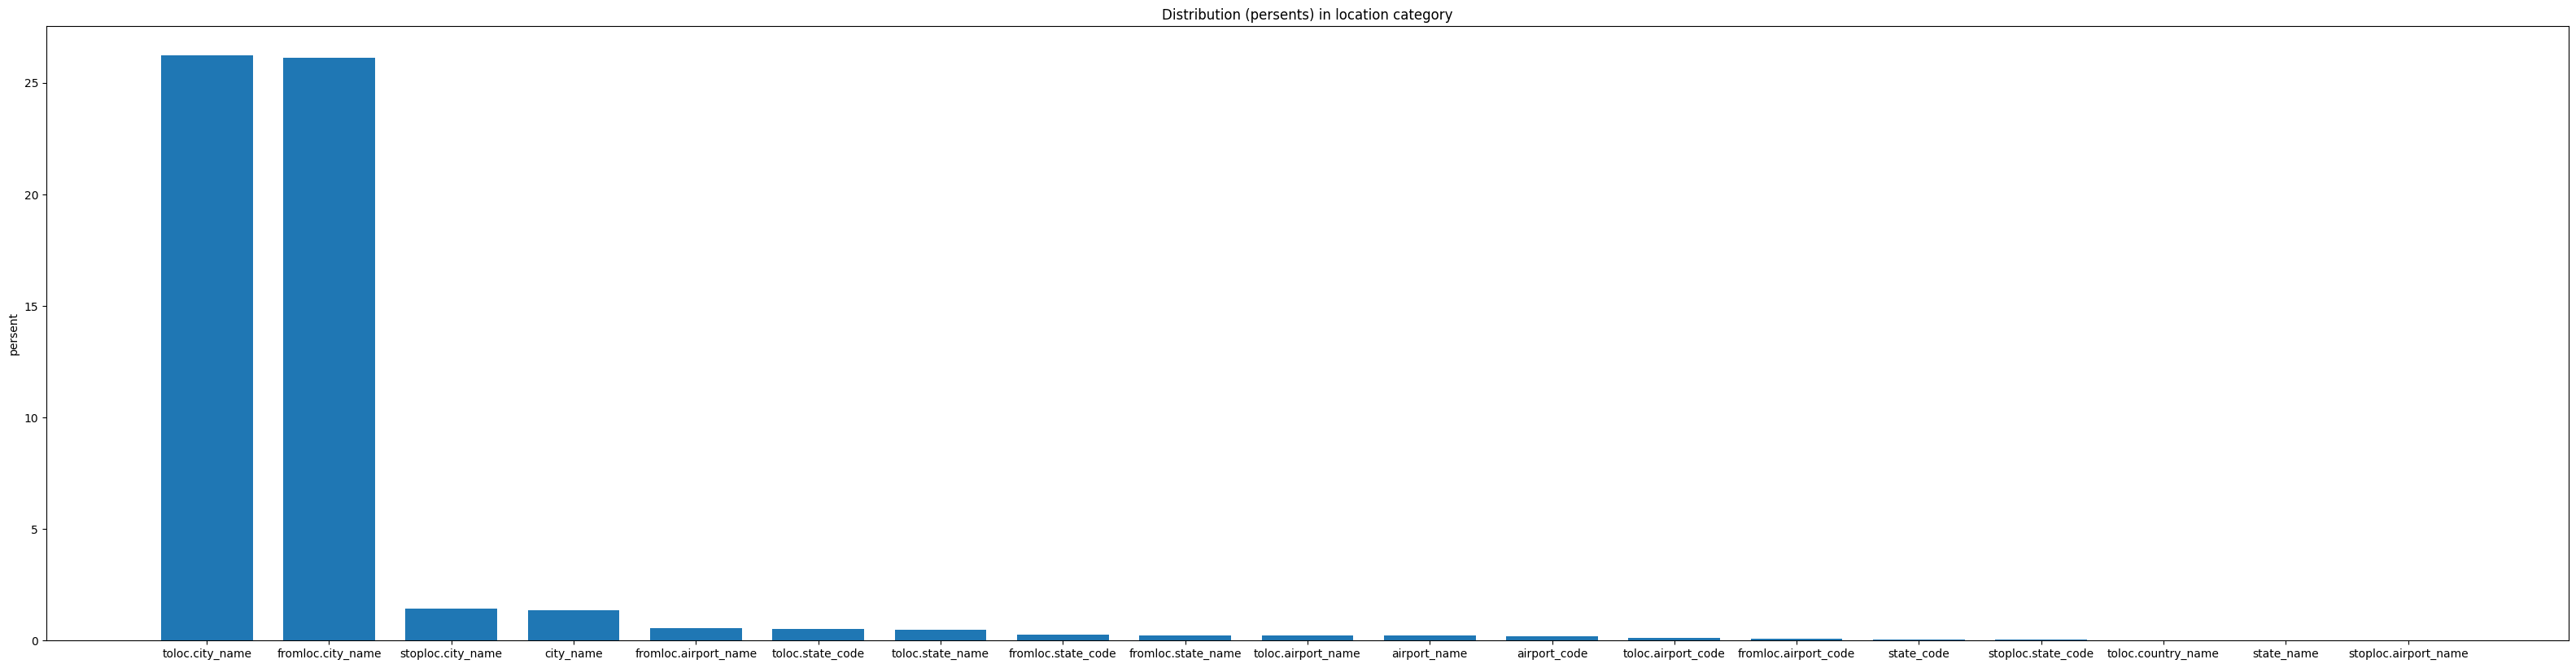

In [148]:
utils.show_classes_distribution(
    loc_category_persentage,
    plt_name="Distribution (persents) in location category",
    ylabel="persent",
    figsize=(40, 10)
)


#### 4. Разное

In [149]:
exclude_list = loc_category + date_category + time_category
misc_category = set()
for key in entity_classes.train:
    items = utils.get_entity_classes_in_category(
        key, entity_classes.train, blocklist=exclude_list
    )
    if items is not None:
        for item in items:
            misc_category.add(item)
list(misc_category)


['aircraft_code',
 'economy',
 'fare_amount',
 'fare_basis_code',
 'flight_days',
 'days_code',
 'transport_type',
 'class_type',
 'restriction_code',
 'meal',
 'connect',
 'cost_relative',
 'meal_code',
 'airline_name',
 'flight_mod',
 'or',
 'flight_stop',
 'flight_number',
 'airline_code',
 'mod',
 'round_trip',
 'meal_description']

In [150]:
misc_category_distribution = utils.eval_entity_classes_distribution(
    atis.train, misc_category
)
misc_category_persentage = utils.eval_persentage(
    misc_category_distribution, entity_classes_distribution.train_size
)

print(
    pd.DataFrame({"misc_category_persentage": misc_category_persentage})
      .sort_values(by="misc_category_persentage", ascending=False)
)


                  misc_category_persentage
airline_name                      4.233603
round_trip                        2.101703
cost_relative                     2.077546
flight_mod                        1.986955
class_type                        1.310545
flight_stop                       1.014615
airline_code                      0.821355
flight_number                     0.507308
fare_basis_code                   0.458993
or                                0.398599
meal_description                  0.344244
fare_amount                       0.320087
transport_type                    0.289890
meal                              0.277811
connect                           0.241575
flight_days                       0.235536
economy                           0.217418
aircraft_code                     0.187221
mod                               0.181181
restriction_code                  0.138906
meal_code                         0.036236
days_code                         0.018118


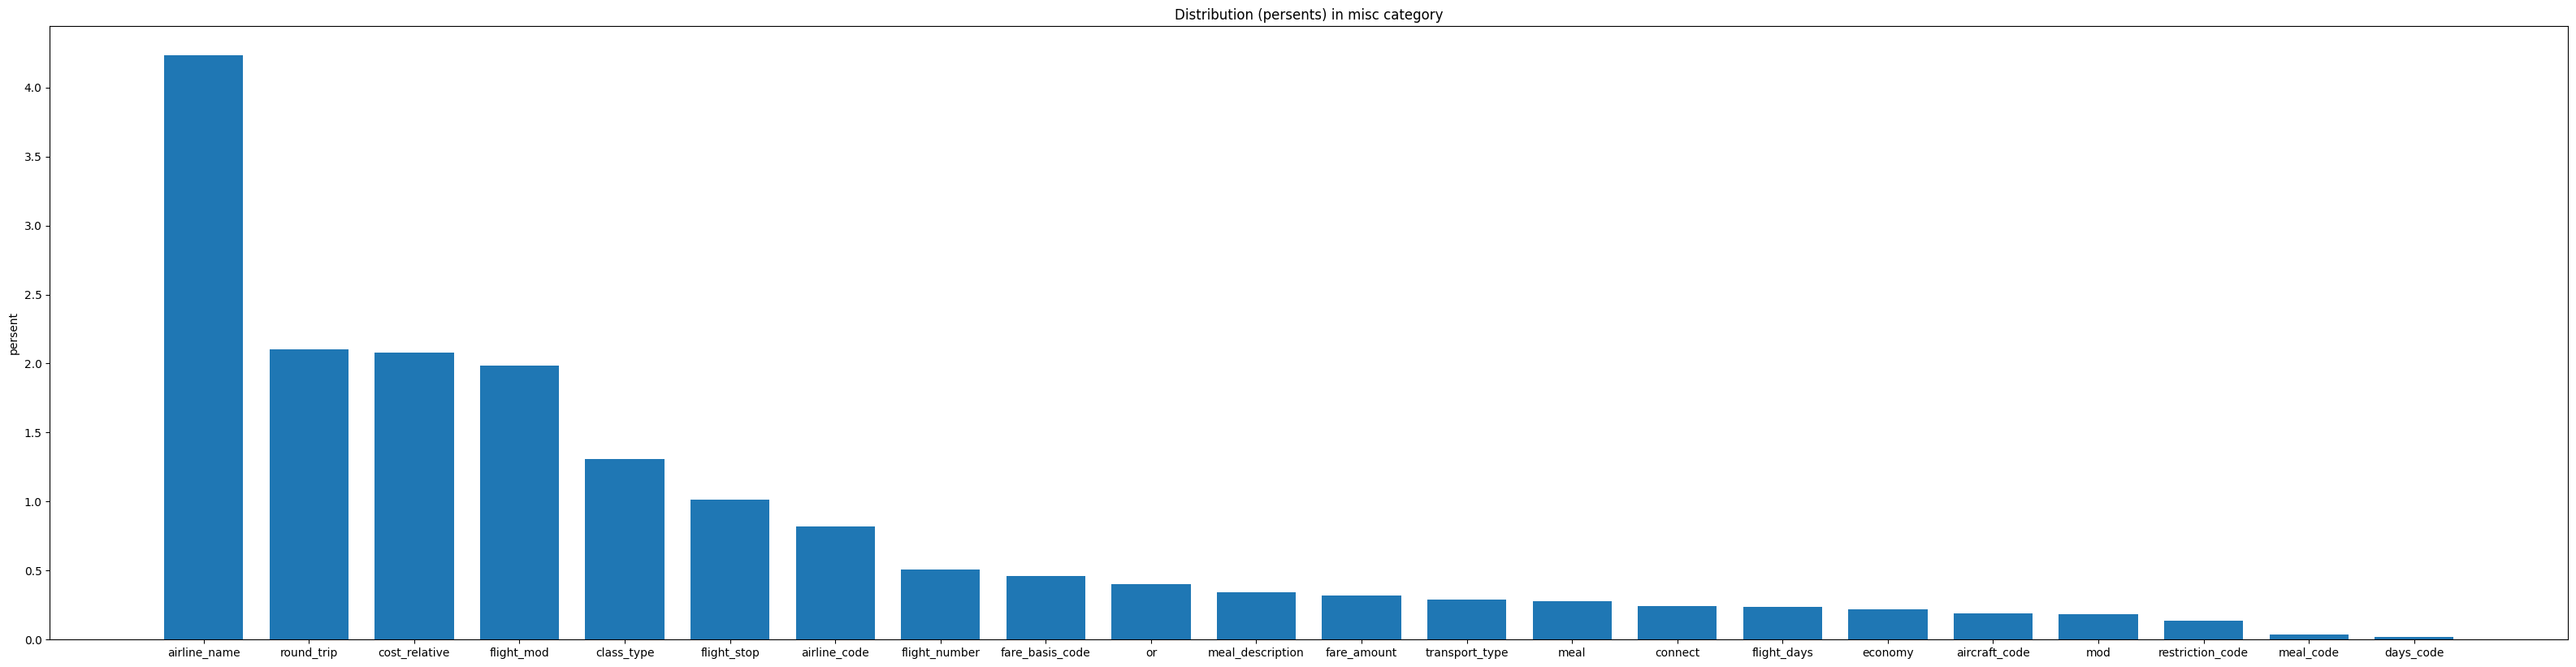

In [151]:
utils.show_classes_distribution(
    misc_category_persentage,
    plt_name="Distribution (persents) in misc category",
    ylabel="persent",
    figsize=(40, 10)
)


## Сохранение промежуточных результатов в `json` файл

In [152]:
atis_save_path = "../data/preprocessed/atis/"


In [153]:
atis.train.to_json(atis_save_path + "train.json")
atis.test.to_json(atis_save_path + "test.json")
